<a href="https://colab.research.google.com/github/MakeThaClap/EstadisticaVerano/blob/main/PROBLEMARIO_UNIDAD_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [ ]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" tiempo ~ C(metodo)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("No hay relacion entre X y Y")
else:
  print("Si hay relacion entre X y Y")
tabla_anova
#Se acepta la hipotesis nula, si hay relacion entre variables

Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(metodo),3.0,69.5,23.166667,9.423729,0.001771
Residual,12.0,29.5,2.458333,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
  #Se acepta la hipotesis nula, el valor p es mayor al nivel de significancia
  #ns=0.05

valor-p shapiro= 0.2808008139238357
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene

#Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")

#H0: Homoscedasticidad (varianzas iguales)
#H1: Heteroscedasticidad (varianzas diferentes)

p-valor de Levene: 0.4485146502776487
Hay homosedasticidad o Las varianzas son iguales


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

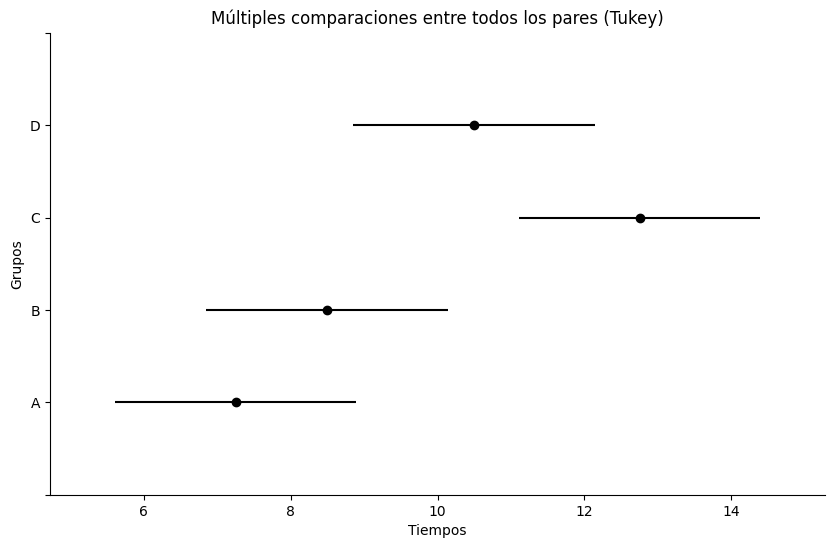

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tipo,valor
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,tipo,valor
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Y ~ X
modelo_lineal = ols("valor~C(tipo)",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova

#Se rechaza hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(tipo),3.0,7019.458333,2339.819444,22.755356,0.000001
Residual,20.0,2056.500000,102.825000,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_sh= shapiro(modelo_lineal.resid)
print(f"valor-p de Shapiro: {valor_p_sh: 0.4f}/n")

#Se rechaza hipotesis nula
#ns=0.05

valor-p de Shapiro:  0.0097/n


Lambda óptimo: -3.707788382033557


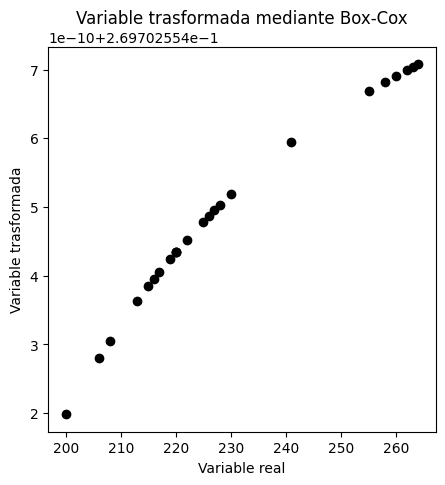

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["observacion_boxcox"], lambda_opt = boxcox(df["valor"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["valor"], df["observacion_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" observacion_boxcox ~ C(tipo)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print(" Ho: No hay relacion entre X y Y")
else:
  print(" H1: Si hay relacion entre X y Y")
tabla_anova


 H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(tipo),3.0,3.735520e-19,1.245173e-19,23.368223,9.595693e-07
Residual,20.0,1.065698e-19,5.328489e-21,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")

valor-p shapiro= 0.4576953738713335
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tipo'] == 'A']['valor']
grupo2 = df[df['tipo'] == 'B']['valor']
grupo3 = df[df['tipo'] == 'C']['valor']
grupo4 = df[df['tipo'] == 'D']['valor']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")


p-valor de Levene: 0.6351342635286297


In [ ]:
from scipy.stats import levene

#Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tipo'] == 'A']['observacion_boxcox']
grupo2 = df[df['tipo'] == 'B']['observacion_boxcox']
grupo3 = df[df['tipo'] == 'C']['observacion_boxcox']
grupo4 = df[df['tipo'] == 'D']['observacion_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("H1: Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Ho:Hay homosedasticidad o Las varianzas son iguales")

p-valor de Levene: 0.3428159311494669
Ho:Hay homosedasticidad o Las varianzas son iguales


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0  -62.553 -29.7803   True
     A      C -25.8333 0.0014 -42.2197   -9.447   True
     A      D    -35.5    0.0 -51.8863 -19.1137   True
     B      C  20.3333 0.0118    3.947  36.7197   True
     B      D  10.6667 0.2926  -5.7197   27.053  False
     C      D  -9.6667 0.3743  -26.053   6.7197  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

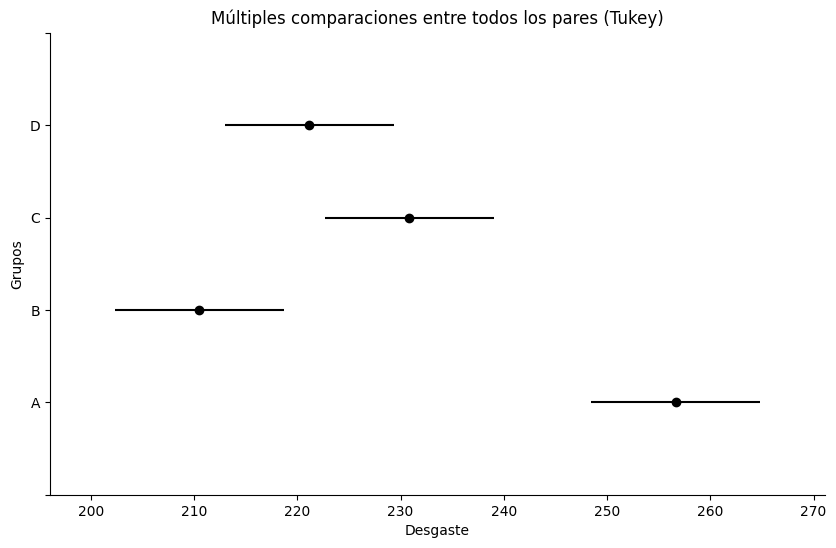

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['tipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Desgaste")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B     -0.0    0.0  -0.0  -0.0   True
     A      C     -0.0 0.0048  -0.0  -0.0   True
     A      D     -0.0 0.0001  -0.0  -0.0   True
     B      C      0.0 0.0018   0.0   0.0   True
     B      D      0.0 0.0613  -0.0   0.0  False
     C      D     -0.0  0.401  -0.0   0.0  False
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

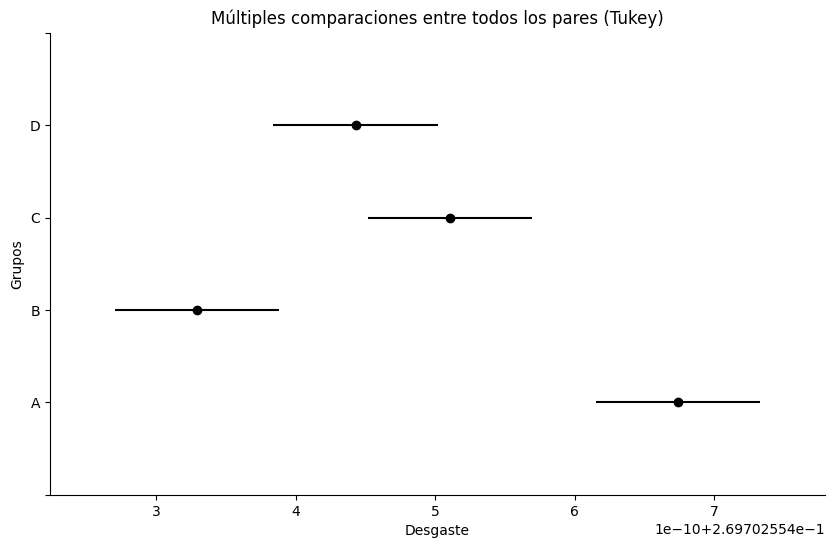

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['observacion_boxcox'], groups=df['tipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Desgaste")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
#CONCLUSION

# Se rechaza la hipotesis nula, si hay relacion entre las variables
# Los datos siguen una distribucion normal


3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,tiempo
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,tratamiento,tiempo
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" tiempo ~ C(tratamiento)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova
#SI hay diferencia entre grupos
#SI hay relacion entre eltiempo de coxion y el tratamiento
#El valor P es menor al nivel de significancia

H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),3.0,95041.250000,31680.416667,1558.966022,1.260640e-27
Residual,24.0,487.714286,20.321429,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
#Ho:Hay normalidad entre los residuos
#H1:No hay normalidad entre los residuos
#0.05
#valor p de 0.3468
#se rechaza la hipotesis alternativa por lo tanto hay normalidad

valor-p shapiro= 0.34689165649616827
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene

#Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'T1']['tiempo']
grupo2 = df[df['tratamiento'] == 'T2']['tiempo']
grupo3 = df[df['tratamiento'] == 'T3']['tiempo']
grupo4 = df[df['tratamiento'] == 'T4']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")

#Ho: Homoscedasticidad
#H1: Heterosedasticidad
#0.05
#Valor p de 0.9201
#Se acepta hipotesis nula por lo tanto hay homocedasticidad

p-valor de Levene: 0.9201477397132211
Hay homosedasticidad o Las varianzas son iguales


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

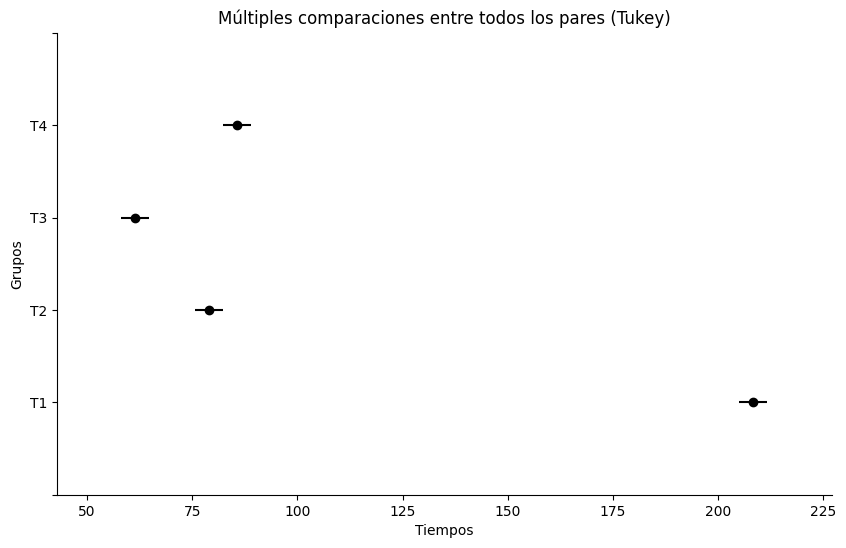

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Tiempos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.995


In [ ]:
#CONCLUSION
#Se recomienda aplicar el tratamiento numero 3 previamente para que sea menor el tiempo de coxion de los fijoles

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
temperatura,intensidad
20C,15
20C,18
20C,13
20C,12
40C,17
40C,21
40C,11
40C,16
60C,23
60C,19
60C,25
60C,22
80C,28
80C,32
80C,34
80C,31
100C,45
100C,51
100C,57
100C,48
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,temperatura,intensidad
0,20C,15
1,20C,18
2,20C,13
3,20C,12
4,40C,17
5,40C,21
6,40C,11
7,40C,16
8,60C,23
9,60C,19


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Y ~ X
modelo_lineal = ols("intensidad~C(temperatura)",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova

#SI hay diferencia entre temperaturas

,df,sum_sq,mean_sq,F,PR(>F)
C(temperatura),4.0,3411.8,852.950000,68.054521,1.963480e-09
Residual,15.0,188.0,12.533333,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_sh= shapiro(modelo_lineal.resid)
print(f"valor-p de Shapiro: {valor_p_sh: 0.4f}/n")

#Se rechaza hipotesis nula, existe normalidad
#ns=0.05


valor-p de Shapiro:  0.7785/n


In [ ]:
from scipy.stats import levene

#Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['temperatura'] == '20C']['intensidad']
grupo2 = df[df['temperatura'] == '40C']['intensidad']
grupo3 = df[df['temperatura'] == '60C']['intensidad']
grupo4 = df[df['temperatura'] == '80C']['intensidad']
grupo5 = df[df['temperatura'] == '100C']['intensidad']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print(" H1: Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print(" Ho: Hay homosedasticidad o Las varianzas son iguales")

#Ho: Hay homoscedasticidad
#H1: Heterosedasticidad
#0.05
#Valor p es de 0.6159
# se rechaza la hipotesis alternativa y se acepta la hipotesis nula
#por lo tanto hay homocedasticidad

p-valor de Levene: 0.6159602096484009
 Ho: Hay homosedasticidad o Las varianzas son iguales


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  100C    20C   -35.75    0.0 -43.4801 -28.0199   True
  100C    40C    -34.0    0.0 -41.7301 -26.2699   True
  100C    60C    -28.0    0.0 -35.7301 -20.2699   True
  100C    80C    -19.0    0.0 -26.7301 -11.2699   True
   20C    40C     1.75 0.9535  -5.9801   9.4801  False
   20C    60C     7.75 0.0493   0.0199  15.4801   True
   20C    80C    16.75 0.0001   9.0199  24.4801   True
   40C    60C      6.0 0.1696  -1.7301  13.7301  False
   40C    80C     15.0 0.0002   7.2699  22.7301   True
   60C    80C      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

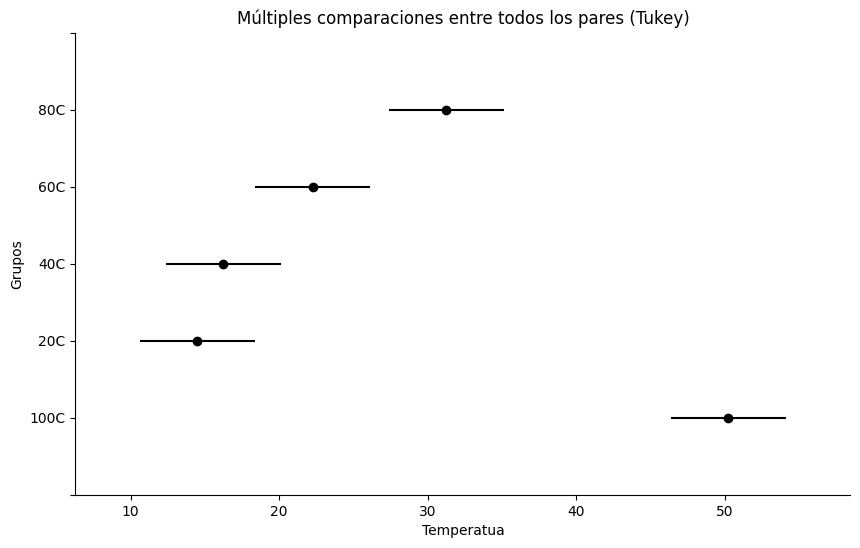

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['intensidad'], groups=df['temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Temperatua")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(temperatura)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.948


In [ ]:
#CONCLUSION
#Es recomendable que no se exponga a temperaturas mayores de 60°C

In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
#Ho:Hay normalidad en los residuales
#H1:No hay normalidad en los residuales
#0.55
#valor p es de 0.77
#por lo tanto se rechaza la hipotesis alternativa y hay normalidad en los residuales

valor-p shapiro= 0.7785351257478148
Los datos siguen una distribucion normal 



5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje
CON,5.3
CON,4.0
CON,4.0
CON,4.0
CON,2.6
CON,2.1
CON,5.1
CON,4.1
CON,4.1
CON,3.2
CON,5.1
CON,2.2
CON,4.1
SIN,8.0
SIN,13.2
SIN,7.2
SIN,8.2
SIN,9.1
SIN,6.7
SIN,12.6
SIN,16.3
SIN,9.2
SIN,6.4
SIN,7.2
SIN,17.2
SIN,12.3
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,tratamiento,porcentaje
0,CON,5.3
1,CON,4.0
2,CON,4.0
3,CON,4.0
4,CON,2.6
5,CON,2.1
6,CON,5.1
7,CON,4.1
8,CON,4.1
9,CON,3.2


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Y ~ X
modelo_lineal = ols("porcentaje~C(tratamiento)",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova

#Se rechaza hipotesis nula, al menos un grupo es distinto

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,269.449615,269.449615,37.102806,0.000003
Residual,24.0,174.293846,7.262244,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_sh= shapiro(modelo_lineal.resid)
print(f"valor-p de Shapiro: {valor_p_sh: 0.4f}/n")
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
#Se acepta la hipotesis nula, hay normalidad
#ns=0.05

valor-p de Shapiro:  0.0824/n
Los datos siguen una distribucion normal 



Lambda óptimo: -0.053872277136152676


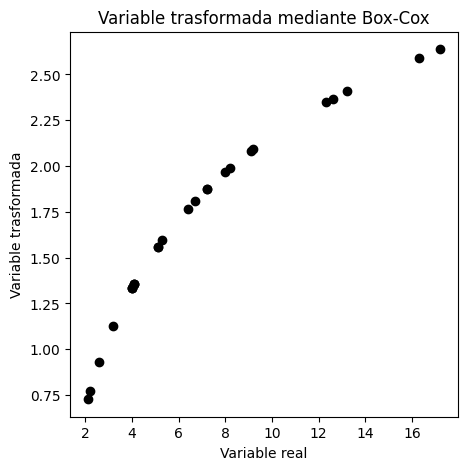

In [ ]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["porcentaje_boxcox"], lambda_opt = boxcox(df["porcentaje"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["porcentaje"], df["porcentaje_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

#Entre mas cerca este lambda de 1, mas literal es la interpretacion

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Y ~ X
modelo_lineal = ols("porcentaje_boxcox~C(tratamiento)",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova

#Se rechaza hipotesis nula, tal menos un grupo es distinto

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,5.040324,5.040324,58.843753,6.583032e-08
Residual,24.0,2.055745,0.085656,NaN,NaN


In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'CON']['porcentaje']
grupo2 = df[df['tratamiento'] == 'SIN']['porcentaje']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

#Se rechaza la hipotesis nula, no hay homoscedasticidad

p-valor de Levene: 0.006953158590874458


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
   CON    SIN   6.4385   0.0 4.2569  8.62   True
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

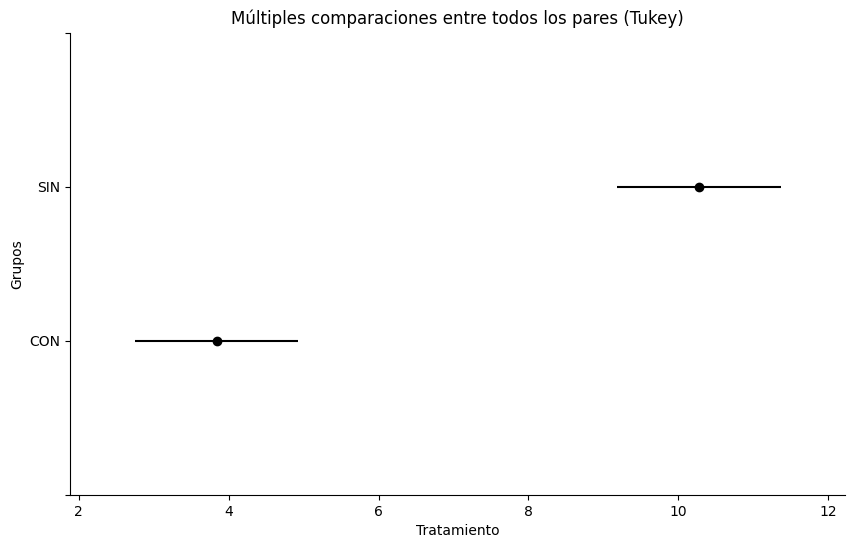

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Tratamiento")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   CON    SIN   0.8806   0.0 0.6437 1.1175   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

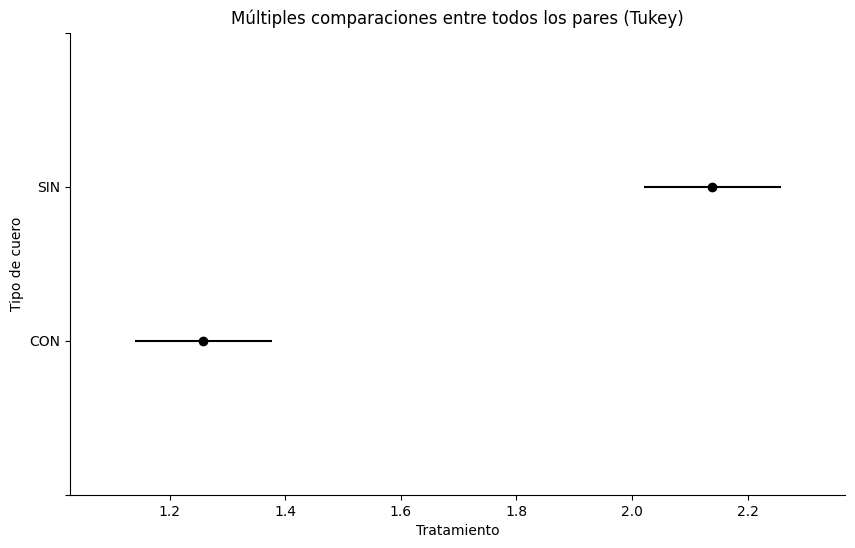

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tipo de cuero", xlabel="Tratamiento")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#No hay diferencia significativa entre B y D

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.710


6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''almidon,dureza
2%,4.3
2%,5.2
2%,4.8
2%,4.5
5%,6.5
5%,7.3
5%,6.9
5%,6.1
10%,9.0
10%,7.8
10%,8.5
10%,8.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,almidon,dureza
0,2%,4.3
1,2%,5.2
2,2%,4.8
3,2%,4.5
4,5%,6.5
5,5%,7.3
6,5%,6.9
7,5%,6.1
8,10%,9.0
9,10%,7.8


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" dureza ~ C(almidon)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova

H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(almidon),2.0,26.726667,13.363333,58.101449,0.000007
Residual,9.0,2.070000,0.230000,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
  #Se rechaza hipotesis nula
#ns=0.05

valor-p shapiro= 0.4295206808037123
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene

#Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['almidon'] == '2%']['dureza']
grupo2 = df[df['almidon'] == '5%']['dureza']
grupo3 =- df[df['almidon'] == '10%']['dureza']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")


p-valor de Levene: 0.771773370798543
Hay homosedasticidad o Las varianzas son iguales


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10%     2%    -3.65    0.0 -4.5968 -2.7032   True
   10%     5%    -1.65 0.0023 -2.5968 -0.7032   True
    2%     5%      2.0 0.0006  1.0532  2.9468   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

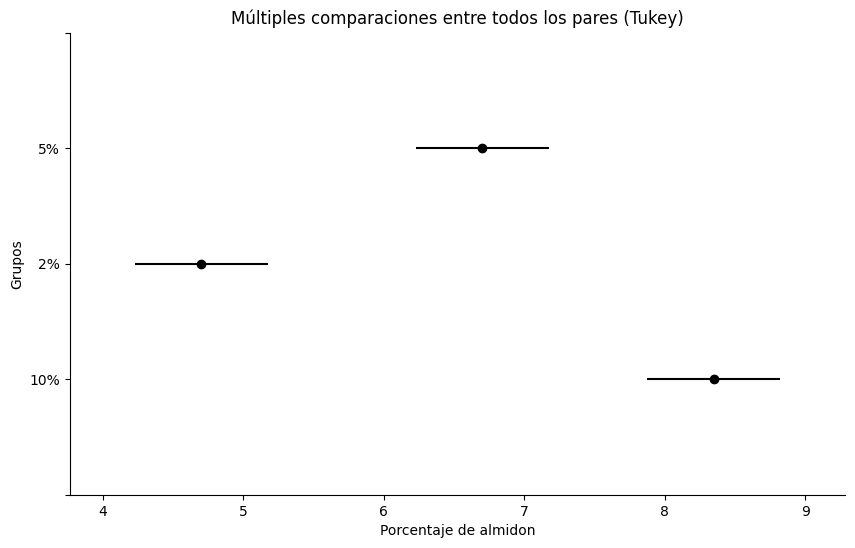

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['dureza'], groups=df['almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Porcentaje de almidon")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(almidon)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#Tmanio del efecto, justifica el 94.8% de variabilidad

η² (tamaño de efecto): 0.928


7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''nivel_nitrogeno,rendimiento
nivel1,14.823
nivel1,14.676
nivel1,14.720
nivel1,14.5141
nivel1,15.065
nivel2,25.151
nivel2,25.401
nivel2,25.131
nivel2,25.031
nivel2,25.267
nivel3,32.605
nivel3,32.460
nivel3,32.256
nivel3,32.669
nivel3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,nivel_nitrogeno,rendimiento
0,nivel1,14.8230
1,nivel1,14.6760
2,nivel1,14.7200
3,nivel1,14.5141
4,nivel1,15.0650
5,nivel2,25.1510
6,nivel2,25.4010
7,nivel2,25.1310
8,nivel2,25.0310
9,nivel2,25.2670


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" rendimiento ~ C(nivel_nitrogeno)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova

H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(nivel_nitrogeno),2.0,788.340773,394.170387,10131.619332,4.298250e-20
Residual,12.0,0.466860,0.038905,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
#Se rechaza hipotesis nula
#ns=0.05

valor-p shapiro= 0.8890610190283172
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene
#Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['nivel_nitrogeno'] == 'nivel1']['rendimiento']
grupo2 = df[df['nivel_nitrogeno'] == 'nivel2']['rendimiento']
grupo3 = df[df['nivel_nitrogeno'] == 'nivel3']['rendimiento']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")

p-valor de Levene: 0.5977763142684792
Hay homosedasticidad o Las varianzas son iguales


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
nivel1 nivel2  10.4366   0.0 10.1038 10.7694   True
nivel1 nivel3  17.6606   0.0 17.3278 17.9934   True
nivel2 nivel3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

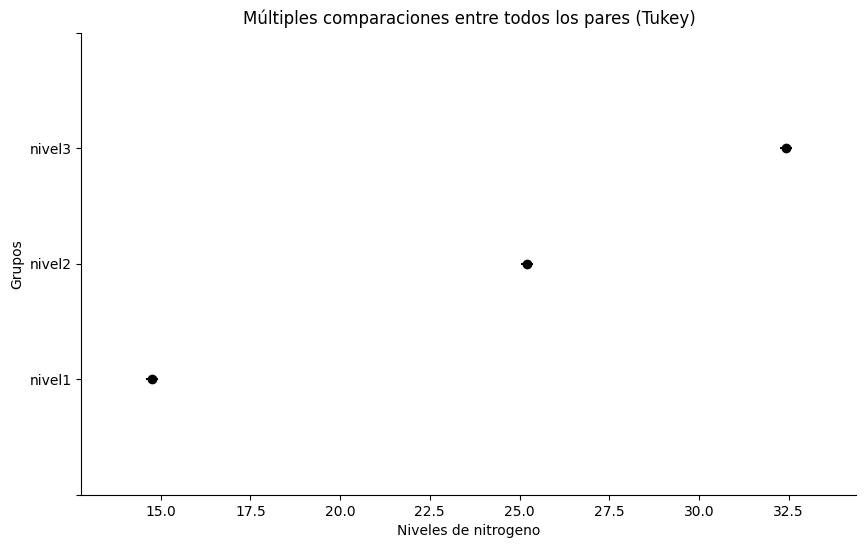

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimiento'], groups=df['nivel_nitrogeno'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Niveles de nitrogeno")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''aglutinante,friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,aglutinante,friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" friabilidad ~ C(aglutinante)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova
#

H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(aglutinante),2.0,292.920971,146.460485,4420.972597,6.198213e-18
Residual,12.0,0.397543,0.033129,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
#Se rechaza hipotesis nula
#ns=0.05

valor-p shapiro= 0.42143454193876007
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene
grupo1 = df[df['aglutinante'] == 'PVP']['friabilidad']
grupo2 = df[df['aglutinante'] == 'CMC']['friabilidad']
grupo3 = df[df['aglutinante'] == 'Gre']['friabilidad']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")

p-valor de Levene: 0.8018412374552168
Hay homosedasticidad o Las varianzas son iguales


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

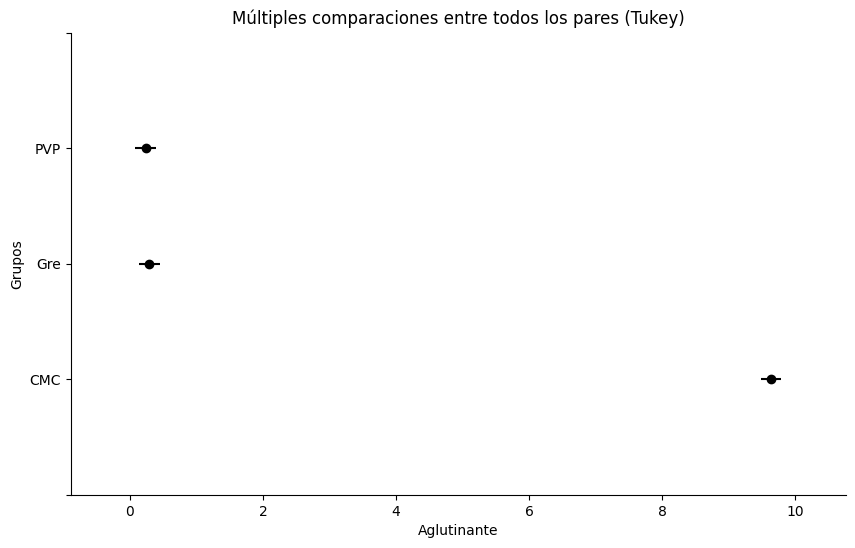

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['friabilidad'], groups=df['aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Aglutinante")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(aglutinante)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.999


9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''clona,azucares_reductores
1,8.69
1,6.68
1,6.83
1,6.43
1,10.30
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,clona,azucares_reductores
0,1,8.69
1,1,6.68
2,1,6.83
3,1,6.43
4,1,10.30
5,2,8.00
6,2,16.41
7,2,12.43
8,2,10.99
9,2,15.53


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" azucares_reductores ~ C(clona)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova

H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(clona),3.0,209.90716,69.969053,12.327073,0.000198
Residual,16.0,90.81676,5.676048,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
  #Se rechaza hipotesis nula
#ns=0.05

valor-p shapiro= 0.7677173153296
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene
grupo1 = df[df['clona'] == 1]['azucares_reductores']
grupo2 = df[df['clona'] == 2]['azucares_reductores']
grupo3 = df[df['clona'] == 3]['azucares_reductores']
grupo4 = df[df['clona'] == 4]['azucares_reductores']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")


p-valor de Levene: 0.4290096340206233
Hay homosedasticidad o Las varianzas son iguales


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

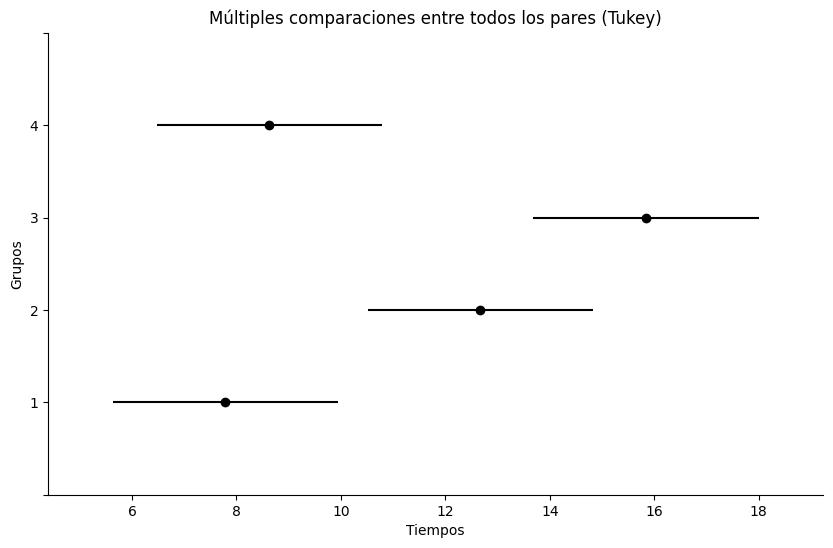

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['azucares_reductores'], groups=df['clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Clona")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3


In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(clona)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.698


10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''tratamiento,valor
con_tratam,5.30
con_tratam,4.03
con_tratam,4.00
con_tratam,2.56
con_tratam,5.06
con_tratam,4.06
con_tratam,2.08
con_tratam,4.03
con_tratam,2.04
con_tratam,1.18
sin_tratam,8.02
sin_tratam,13.18
sin_tratam,7.15
sin_tratam,9.11
sin_tratam,8.23
sin_tratam,16.3
sin_tratam,9.20
sin_tratam,6.35
sin_tratam,7.15
sin_tratam,8.66
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df


,tratamiento,valor
0,con_tratam,5.30
1,con_tratam,4.03
2,con_tratam,4.00
3,con_tratam,2.56
4,con_tratam,5.06
5,con_tratam,4.06
6,con_tratam,2.08
7,con_tratam,4.03
8,con_tratam,2.04
9,con_tratam,1.18


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" valor ~ C(tratamiento)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_psh<0.05:
  print("Ho: No hay relacion entre X y Y")
else:
  print("H1: Si hay relacion entre X y Y")
tabla_anova

H1: Si hay relacion entre X y Y


,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,174.109005,174.109005,30.605669,0.00003
Residual,18.0,102.398090,5.688783,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_psh = shapiro(modelo_lineal.resid)
print("valor-p shapiro=", valor_p_psh)
if valor_p_psh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")
  #Se rechaza hipotesis nula
#ns=0.05

valor-p shapiro= 0.7677173153296
Los datos siguen una distribucion normal 



In [ ]:
from scipy.stats import levene
grupo1 = df[df['tratamiento'] == 'con_tratam']['valor']
grupo2 = df[df['tratamiento'] == 'sin_tratam']['valor']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")



p-valor de Levene: 0.30433662983094306
Hay homosedasticidad o Las varianzas son iguales


Lambda óptimo: 0.32061169162391906


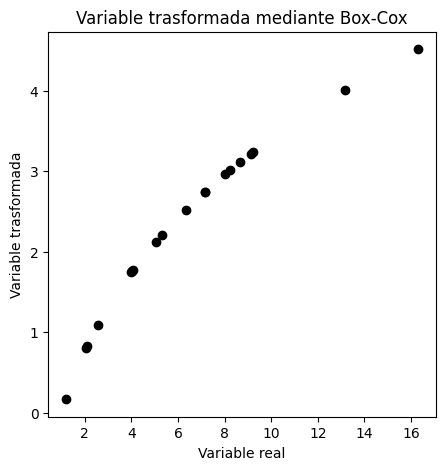

In [ ]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["porcentaje_boxcox"], lambda_opt = boxcox(df["valor"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["valor"], df["porcentaje_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()

#Entre mas cerca este lambda de 1, mas literal es la interpretacion

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Y ~ X
modelo_lineal = ols("porcentaje_boxcox~C(tratamiento)",data=df).fit()
tabla_anova= sm.stats.anova_lm(modelo_lineal)
tabla_anova

#Se rechaza hipotesis nula, tal menos un grupo es distinto

,df,sum_sq,mean_sq,F,PR(>F)
C(tratamiento),1.0,15.859834,15.859834,38.91081,0.000007
Residual,18.0,7.336702,0.407595,NaN,NaN


In [ ]:
from scipy.stats import shapiro
_, valor_p_sh= shapiro(modelo_lineal.resid)
print(f"valor-p de Shapiro: {valor_p_sh: 0.4f}/n")

#Se rechaza hipotesis nula
#ns=0.05

valor-p de Shapiro:  0.9455/n


In [ ]:
from scipy.stats import levene
grupo1 = df[df['tratamiento'] == 'con_tratam']['porcentaje_boxcox']
grupo2 = df[df['tratamiento'] == 'sin_tratam']['porcentaje_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
if p < 0.05:
    print("Hay heterosedasticidad o Las varianzas no son iguales")
else:
    print("Hay homosedasticidad o Las varianzas son iguales")



p-valor de Levene: 0.700897370037938
Hay homosedasticidad o Las varianzas son iguales


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1     group2   meandiff p-adj lower upper reject
-------------------------------------------------------
con_tratam sin_tratam    5.901   0.0  3.66 8.142   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

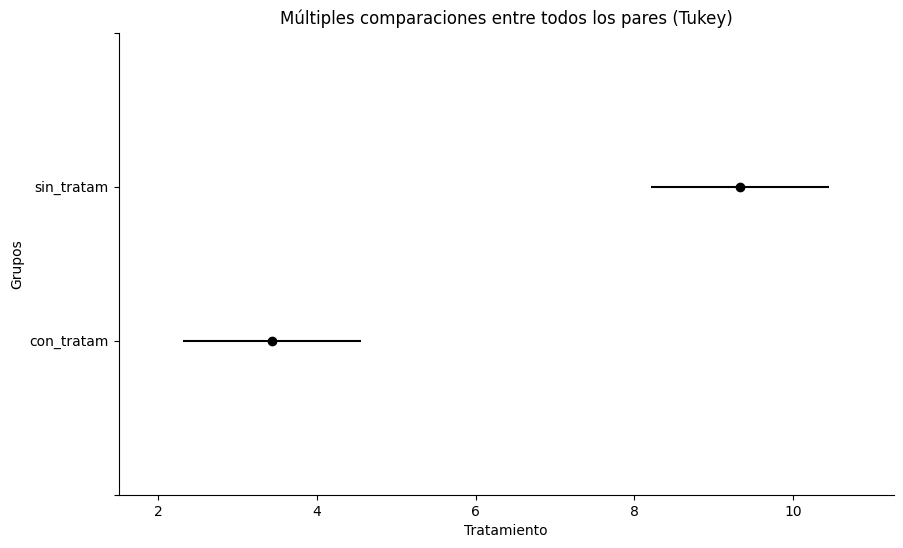

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Tratamiento")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3



   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
con_tratam sin_tratam    1.781   0.0 1.1812 2.3808   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

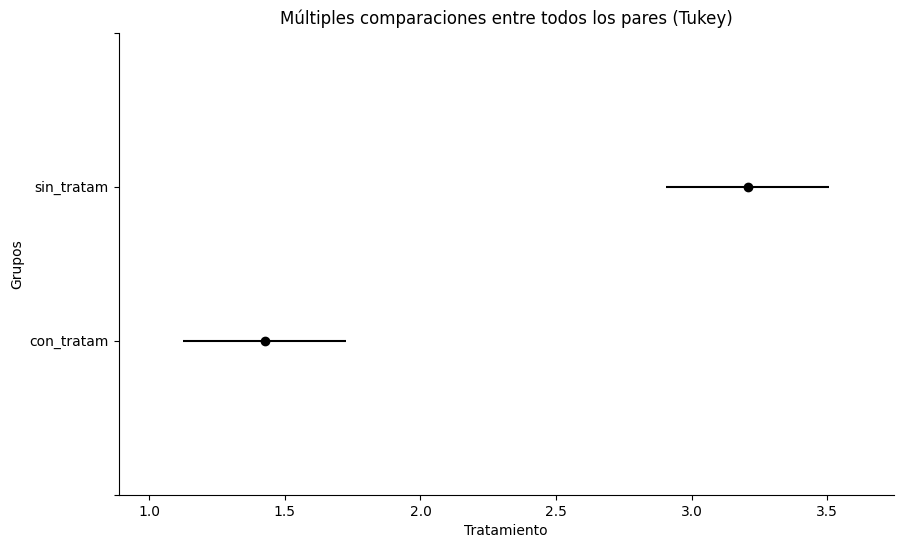

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_boxcox'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Tratamiento")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")